## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
#import systemcheck
import sklearn.metrics as metrics
pd.set_option('display.max_colwidth', -1)

C:\Users\jugal\AppData\Local\Temp/ipykernel_12884/2545662680.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Loading data

In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\jugal\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10

In [4]:
print (books.shape)
print (users.shape)
print (ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


## Analysing the data

In [5]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [6]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [7]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


### Users

In [9]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
users.loc[users.Age.isna(),:]

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [12]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

#replacing NaNs with mean
#users.Age = users.Age.fillna(users.Age.mean())

#custom
users.Age = users.Age.fillna(users.Age.median())

In [13]:
users.Age

0         32.0
1         18.0
2         32.0
3         17.0
4         32.0
          ... 
278853    32.0
278854    50.0
278855    32.0
278856    32.0
278857    32.0
Name: Age, Length: 278858, dtype: float64

In [14]:
users.isna().sum()

userID      0
Location    0
Age         0
dtype: int64

### Ratings Dataset

In [15]:
n_users = users.shape[0]
n_books = books.shape[0]
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [17]:
ratings.shape

(1149780, 3)

In [18]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [19]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = ratings[ratings.userID.isin(users.userID)]

In [20]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

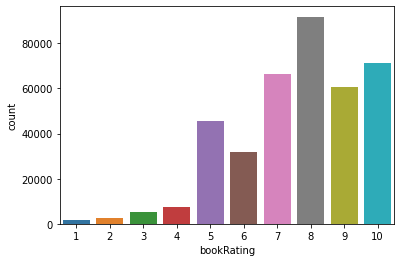

In [21]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [22]:
ratings_explicit.head(10)

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
21,276747,0943066433,7
23,276747,1885408226,7
24,276748,0747558167,6


### Converting to matrix

In [23]:
#To cope up with computing power I have and to reduce the dataset size, I am considering users who have rated atleast 100 books
#and books which have atleast 100 ratings
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating')

In [24]:
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
ratings_matrix.head(10)

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
ratings_matrix.shape

(449, 66574)

## Recommendation logic

In [28]:
def find_k_similar_items(item_id, ratings, metric='cosine', k=4):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k)
    similarities = 1-distances.flatten()
    return pd.Series(data=similarities.flatten(), index=indices.flatten())

In [29]:
def recommend(user_id, ratings_matrix):
    user = ratings_matrix.loc[user_id, :]
    avg_rating = np.mean(user[user>0])
    
    #select 10 random books > avg rating of all the ratings given by the user
    top_books = user[user > avg_rating]
    top_books = top_books.sample(10, random_state=76)

    all_similar_items = pd.Series(dtype=object)

    #for each book compute similar books and add them to all_similar items
    for book_id, rating in top_books.iteritems():
        all_similar_items = all_similar_items.append(find_k_similar_items(book_id, ratings_matrix))
    
    #consider only those books with similarity score > 0.8
    all_similar_items = all_similar_items[all_similar_items > 0.8]
    all_similar_items.sort_values(ascending=False, inplace=True)
    
    recommended_book_indices = all_similar_items.index.values

    recommended_df = pd.DataFrame(books.values[recommended_book_indices])
    recommended_df.drop([3,4], axis=1, inplace=True)
    recommended_df.columns = ["ISBN", "Title", "Author"]

    recommended_df.drop_duplicates()

    return recommended_df

In [48]:
def show_books_rated_by_user(user_id, n):
    user = ratings_matrix.loc[user_id, :]
    avg_rating = np.mean(user[user>0])
    
    #select top books
    top_books = user[user > avg_rating]
    merged = pd.merge(top_books, books, left_index=True, right_on="ISBN")
    merged.rename(columns= {user_id: "ratings"}, inplace=True)
    merged = merged.iloc[:n, [1,2,0]]

    return merged

    return merged

In [52]:
show_books_rated_by_user(5582, 30)

,ISBN,bookTitle,ratings
18416,0060174900,The Bell Jar (Perennial Classics),10
18439,0060909005,Collected Poems Reissue,10
18440,0062731009,Cartoon Guide to Physics,10
18441,0062731025,The Cartoon Guide to Statistics,10
5395,014019536X,"Drawing Down the Moon: Witches, Druids, Goddess-Worshippers, and Other Pagans in America Today",10
6160,0140277749,The Bust Guide to the New Girl Order,9
5070,014028009X,Bridget Jones's Diary,10
707,0140293248,The Girls' Guide to Hunting and Fishing,9
18446,0312860226,The Soprano Sorceress (Erde Series),9
3120,0312966970,Four To Score (A Stephanie Plum Novel),10


In [53]:
show_books_rated_by_user(6575, 30)

,ISBN,bookTitle,ratings
4764,006000438X,The Death of Vishnu: A Novel,9
19649,0060081961,Once Upon a Town: The Miracle of the North Platte Canteen,8
14833,0060194995,To Kill a Mockingbird : The 40th Anniversary Edition of the Pulitzer Prize-Winning Novel,9
19784,0060198133,Five Quarters of the Orange,8
3329,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A Novel,8
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,8
133,0060929790,One Hundred Years of Solitude,8
1485,0060934417,Bel Canto: A Novel,9
19663,0060958294,The Natural (Perennial Classics),8
12900,0060976241,The Lone Ranger and Tonto Fistfight in Heaven,8


In [54]:
show_books_rated_by_user(6251, 30)

,ISBN,bookTitle,ratings
18713,0020223722,HOW GREEN WAS MY VALLEY,10
18694,0027582000,"The Lion, the Witch and the Wardrobe",10
18780,0028610105,How to Cook Everything: Simple Recipes for Great Food,10
13645,0060177888,All I Know About Animal Behavior I Learned in Loehmann's Dressing Room,9
18830,0060256680,Where the Sidewalk Ends: The Poems and Drawings of Shel Silverstein,10
16189,0060256737,A Light in the Attic,10
18831,0060256745,A Light in the Attic,10
2802,0060392452,Stupid White Men ...and Other Sorry Excuses for the State of the Nation!,10
10305,0064400565,Stuart Little,10
18895,0064402053,"Sarah, Plain and Tall (Sarah, Plain and Tall)",10


### Recommended books

In [ ]:
recommend(5582, ratings_matrix)

,ISBN,Title,Author
0,0871236508,Mandie and the Charleston Phantom (Mandie Books),Lois Gladys Leppard
1,067974228X,The Invisibles: A Tale of the Eunuchs of India,Zia Jaffrey
2,1878351176,Botticelli (The Library of Great Masters),Bruno Santi
3,1400002370,"Club de la buena estrella (Debolsillo, 338/1)",AMY TAN
4,067974228X,The Invisibles: A Tale of the Eunuchs of India,Zia Jaffrey
5,0140443487,Confucius: The Analects,Confucius
6,0312278497,The Glass Bead Game: (Magister Ludi),Hermann Hesse
7,0373160739,Winter's Bounty (Harlequin American Romance No. 73),Muriel Jensen
8,1400002370,"Club de la buena estrella (Debolsillo, 338/1)",AMY TAN
9,0140443487,Confucius: The Analects,Confucius


In [ ]:
recommend(6575, ratings_matrix)

,ISBN,Title,Author
0,0140621393,Journey to the Centre of the Earth (Penguin Popular Classics),Jules Verne
1,0786883219,Brain Droppings,George Carlin
2,0312316119,Flip-Flopped: A Novel,Jill Smolinski
3,0684823780,Mere Christianity,C. S. Lewis
4,0380726033,Song of the River (Storyteller Trilogy),Sue Harrison
5,0449211991,Banker,Dick Francis
6,0804101787,A Midwife's Story,Penny Armstrong
7,002708230X,"Save Sirrushany! also Agotha, Princess Gwyn, and all the fearsome beasts",Betty Baker
8,1570820872,Disney's the Lion King (Disney Classic Series),Don Ferguson
9,0345414462,Angle of Impact,Bonnie MacDougal


In [ ]:
recommend(6251, ratings_matrix)

,ISBN,Title,Author
0,0345394658,"Return to the Chateau: Preceded By, a Girl in Love",Pauline Reage
1,0425120279,The Hunt for Red October,Tom Clancy
2,0425049442,Men to Match My Mountains,Irving Stone
3,0373632452,"Waste Not, Want Not (Destroyer #130)",Warren Murphy
4,0345394658,"Return to the Chateau: Preceded By, a Girl in Love",Pauline Reage
5,0451207505,Trapped,Greg Iles
6,0425120279,The Hunt for Red October,Tom Clancy
7,0373632452,"Waste Not, Want Not (Destroyer #130)",Warren Murphy
8,0345394658,"Return to the Chateau: Preceded By, a Girl in Love",Pauline Reage
9,0451207505,Trapped,Greg Iles
